1.读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#下一行可以让数据集在单元格中嵌入化显示
%matplotlib inline

In [4]:
dataset = pd.read_csv('data/ex1data1.txt', header=None)
dataset.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


查看数据类型

In [5]:
type(dataset)

pandas.core.frame.DataFrame

查看数据的数据量

In [6]:
dataset.shape

(97, 2)

查看表头

In [7]:
dataset.columns

Index([0, 1], dtype='int64')

打印数据info

In [8]:
dataset.info

<bound method DataFrame.info of           0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]>

获取一些统计量

In [9]:
dataset.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


2.接下来开始提取特征

In [28]:
space_feature = dataset[0]
income_feature = dataset[1]

In [29]:
space_feature.head()

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: 0, dtype: float64

In [12]:
income_feature.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

In [34]:
import numpy as np
X = np.reshape(space_feature.values, (-1, 1))
Y = np.reshape(income_feature.values, (-1, 1))
Y
#这里不通过np.reshape转换的话，训练时会出错

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

4.建立模型

拆分数据集，四分之三训练，四分之一测试

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

用训练集的数据进行训练

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

对测试集预测

In [37]:
Y_pred = regressor.predict(X_test)

可视化

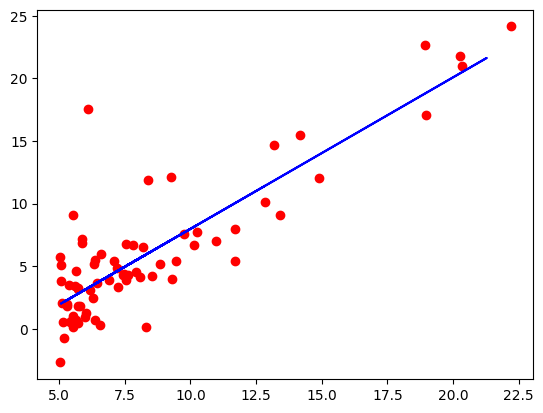

In [38]:
#散点图，红色表示测试集的点
plt.scatter(X_train, Y_train, color='red')
#线图，蓝色表示对测试集进行预测的结果
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.show()